In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, stats
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.svm import SVR

In [2]:
# Loading the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train, df_test])
pd.options.display.max_columns = None

#### Steps to be followed in creating a Machine Learning model

### 1. Data Exploration

#### In this step we are going to...
1. Understand our dataset.
2. feature and their nature
3. Some visualization etc

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Try to understand each feature and type of the feature
### <b>_We know that "SalePrice is the target variable_"</b>

In [4]:
cols = df.columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
# We can work with target variable first

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

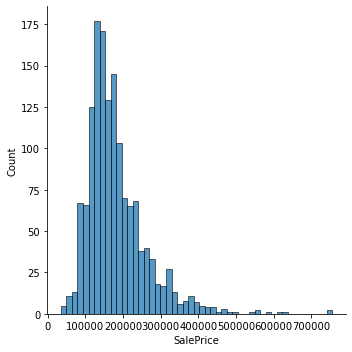

In [7]:
# Histogram of SalePrice
# Here we can see that the data is likely to be positively skewed. (Noted)
sns.displot(df_train['SalePrice'])

In [8]:
# Finding the columns with more correlation with SalePrice
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

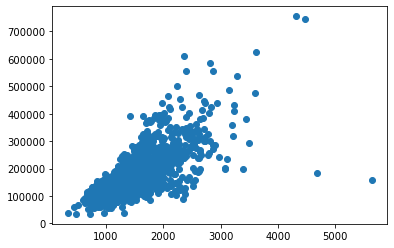

In [9]:
# Visualization 2 variable
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

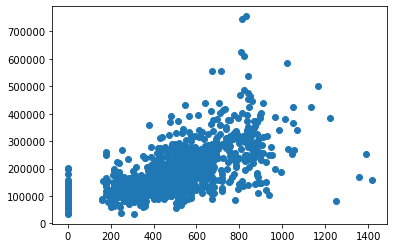

In [10]:
plt.scatter(df_train['GarageArea'], df_train['SalePrice'])

## 2. Imputation of null values
#### _This dataset contains man null values and we are going to set a condition and remove some columns which are not going to be usefull for our model and impute the numerical and categorical variable with median and mode._

In [11]:
# Data Imputation.
def show_missing(df):
    # It show percentage of null values in each column
    pd.options.display.max_rows = None
    display(((df.isnull().sum() / len(df)) * 100))

In [12]:
show_missing(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [13]:
# Drop the columns which has more than 50% null values..
df_train.drop(['Alley', 'MiscFeature', 'PoolQC', 'Fence', 'Id'], axis = 1, inplace = True)
df_test.drop(['Alley', 'MiscFeature', 'PoolQC', 'Fence', 'Id'], axis = 1, inplace = True)

In [14]:
df = pd.concat([df_train, df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [15]:
# Finding numerical an categorical data column names for further use..
cat_variable = [i for i in df.columns if df.dtypes[i] == 'object']
num_variables = [i for i in df.columns if df.dtypes[i] != 'object']

In [16]:
num_variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [18]:
# Selecting the columns with correlation less than 0.1 for removing
num_del = [i for i in num_variables if df_train.corr()['SalePrice'][i] < 0.1]
num_del

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
# Dropping the columns and updating the changes in df also..
df_train.drop(num_del, axis = 1, inplace = True)
df_test.drop(num_del, axis = 1, inplace = True)
df = pd.concat([df_train, df_test])

In [20]:
show_missing(df)

MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
E

In [21]:
cat_variables = [ i for i in df.columns if df.dtypes[i] == 'object']
num_variables = [ i for i in df.columns if df.dtypes[i] != 'object']

In [22]:
# Imputing th misssing values in all the columns

df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(), inplace = True)
df_test['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(), inplace = True)

df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace = True)
df_test['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace = True)

df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace = True)
df_test['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace = True)

df_train['GarageArea'].fillna(df_train['GarageArea'].median(), inplace = True)
df_test['GarageArea'].fillna(df_train['GarageArea'].median(), inplace = True)

df_train['GarageCars'].fillna(df_train['GarageCars'].mode()[0], inplace = True)
df_test['GarageCars'].fillna(df_train['GarageCars'].mode()[0], inplace = True)

df_test['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].median(), inplace = True)
df_test['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].median(), inplace = True)

df = pd.concat([df_train, df_test])


In [23]:
# Here these columns the null values are actually has a value. (Refer description file for further reference)
df_test.fillna({'GarageType': 'NG', 'GarageQual': 'NG', 'GarageFinish': 'NG', 'GarageCond': 'NG', 'FireplaceQu': 'NF'}, inplace= True)
df_train.fillna({'GarageType': 'NG', 'GarageQual': 'NG', 'GarageFinish': 'NG', 'GarageCond': 'NG', 'FireplaceQu': 'NF'}, inplace= True)

df_train.fillna({'BsmtQual': 'NB', 'BsmtCond': 'NB', 'BsmtExposure': 'NB', 'BsmtFinType1': 'NB', 'BsmtFinType2': 'NB'}, inplace = True)
df_test.fillna({'BsmtQual': 'NB', 'BsmtCond': 'NB', 'BsmtExposure': 'NB', 'BsmtFinType1': 'NB', 'BsmtFinType2': 'NB'}, inplace = True)

df_train.fillna({'Electrical': df_train['Electrical'].mode()[0]}, inplace = True)

In [24]:
df = pd.concat([df_train, df_test])
show_missing(df)

MSZoning          0.137033
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtUnfSF         0.034258
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
E

In [25]:
df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0], inplace = True)
df_test['MSZoning'].fillna(df_train['MSZoning'].mode()[0], inplace = True)

df_train['Utilities'].fillna(df_train['Utilities'].mode()[0], inplace = True)
df_test['Utilities'].fillna(df_train['Utilities'].mode()[0], inplace = True)

df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0], inplace = True)
df_test['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0], inplace = True)

df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0], inplace = True)
df_test['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0], inplace = True)

df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0], inplace = True)
df_test['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0], inplace = True)

df_train['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].median(), inplace = True)
df_test['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].median(), inplace = True)


In [26]:
df = pd.concat([df_train, df_test])
show_missing(df)

MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
E

In [27]:
# Finally created Function for imputing the null values you can this function for avoiding the above steps.
def impute_null(df):
    cat_v = [i for i in df.columns if df.dtypes[i] == 'object' if df[i].isnull().values.any()]
    num_v = [i for i in df.columns if df.dtypes[i] != 'object' if df[i].isnull().values.any()]
    for i in num_v:
        df[i].fillna(df_train[i].median(), inplace= True)
    for i in cat_v:
        df[i].fillna(df_train[i].mode()[0], inplace= True)


In [28]:
impute_null(df_train)
impute_null(df_test)

In [29]:
df = pd.concat([df_train, df_test])
show_missing(df)

MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
E

In [30]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,2,1,3,Gd,8,Typ,0,NF,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,WD,Normal,208500.0
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,2,0,3,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,WD,Normal,181500.0
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,2,1,3,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,WD,Normal,223500.0
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,1,0,3,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,0,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,2,1,4,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,WD,Normal,250000.0


## 3. Feature Encoding

Machine learning algorithm can understand and work with numerical data only so we convert the categorical variable to numerical.
<br><B>There are 2 Types of catergorical variables.</B>
1. Ordinal - These variable have somee order or priorites
<br> eg: In this problem there are more column which describe about quality and conditions they are ordinal.

2. Nominal - These variable dosen't have order they all have same priorites _eg: Gender_

In [31]:
# Handling ordinal categories using LabelEncoder
# Ordering them in particular order..
ord_dict = {"LotShape": ['Reg','IR1','IR2','IR3'],
            "LandSlope" : ["Gtl", "Mod", "Sev" ],
            "ExterQual": [  "Ex", "Gd", "TA", "Fa", "Po" ],
            "ExterCond": [  "Ex", "Gd", "TA", "Fa", "Po" ],
            "BsmtQual": [  "Ex", "Gd", "TA", "Fa", "Po", "NB" ],
            "BsmtCond":[  "Ex", "Gd", "TA", "Fa", "Po", "NB" ],
            "BsmtExposure": ["Gd", "Av", "Mn", "No", "NB"],
            "BsmtFinType1":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NB"],
            "BsmtFinType2":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NB"],
            "HeatingQC": [  "Ex", "Gd", "TA", "Fa", "Po"],
            "KitchenQual": [  "Ex", "Gd", "TA", "Fa", "Po"],
            "GarageQual":[  "Ex", "Gd", "TA", "Fa", "Po", "NG"],
            "GarageCond": [  "Ex", "Gd", "TA", "Fa", "Po", "NG" ],
            "Utilities":  ['AllPub','NoSeWa']
        }
cols_ord = ord_dict.keys()
le = LabelEncoder()

for col in cols_ord:
    le.fit(ord_dict[col])
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

In [32]:
df = pd.concat([df_train, df_test])

In [33]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,5,4,2,706.0,6,150.0,856.0,GasA,0,Y,SBrkr,856,854,1710,1.0,2,1,3,2,8,Typ,0,NF,Attchd,2003.0,RFn,2.0,548.0,5,5,Y,0,61,0,WD,Normal,208500.0
1,RL,80.0,9600,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,4,4,CBlock,2,5,1,0,978.0,6,284.0,1262.0,GasA,0,Y,SBrkr,1262,0,1262,0.0,2,0,3,4,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,5,5,Y,298,0,0,WD,Normal,181500.0
2,RL,68.0,11250,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,5,2,2,486.0,6,434.0,920.0,GasA,0,Y,SBrkr,920,866,1786,1.0,2,1,3,2,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,5,5,Y,0,42,0,WD,Normal,223500.0
3,RL,60.0,9550,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,4,4,BrkTil,5,2,4,0,216.0,6,540.0,756.0,GasA,2,Y,SBrkr,961,756,1717,1.0,1,0,3,2,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,5,5,Y,0,35,0,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,5,0,2,655.0,6,490.0,1145.0,GasA,0,Y,SBrkr,1145,1053,2198,1.0,2,1,4,2,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,5,5,Y,192,84,0,WD,Normal,250000.0


In [34]:
# Just updating the column names
cat_variable = [i for i in df.columns if df.dtypes[i] == 'object']
num_variable = [i for i in df.columns if df.dtypes[i] != 'object']

In [35]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
GarageCond      0.246705
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
GarageQual      0.205963
BedroomAbvGr    0.168213
ExterCond       0.117303
ScreenPorch     0.111447
BsmtCond        0.091503
BsmtFinType2    0.072717
LandSlope       0.051152
Utilities      -0.014314
BsmtFinType1   -0.098734
LotShape       -0.255580
BsmtExposure   -0.294589
HeatingQC      -0.400178
BsmtQual       -0.566573
KitchenQual    -0.591175
ExterQual      -0.641178
Name: SalePrice, dtype: f

## 4. Handling Outliers
There are many ways to handle outliers and also its important to handle outliers it may have a big impact on our models output.
<br><b>_Here we are removing the values which are outside the interquartile range for further google it....</b>

In [36]:
dfdup = df_train.copy()
q1 = df_train.quantile(0.25)
q3 = df_train.quantile(0.75)
iqr = q3 - q1
cutoff = 3 * iqr
cols = df_train
lower, upper = q1 - cutoff, q3 + cutoff

def TotalOutliers(df, columns, l, u):
    fin = {}
    for i in columns:
        a = df[df[i] > u[i]].shape[0]
        b = df[df[i] < l[i]].shape[0]
        fin[i] = a + b
        a = 0
        b = 0
    return fin
outliers = TotalOutliers(dfdup, num_variables, lower, upper)

In [37]:
outliers

{'LotFrontage': 16,
 'LotArea': 34,
 'OverallQual': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'MasVnrArea': 28,
 'BsmtFinSF1': 1,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 5,
 '1stFlrSF': 3,
 '2ndFlrSF': 0,
 'GrLivArea': 4,
 'BsmtFullBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 1,
 'TotRmsAbvGrd': 1,
 'Fireplaces': 0,
 'GarageYrBlt': 0,
 'GarageCars': 0,
 'GarageArea': 3,
 'WoodDeckSF': 3,
 'OpenPorchSF': 18,
 'ScreenPorch': 116,
 'SalePrice': 12}

In [38]:
# Dropping columns which has more outliers
df_train.drop(['BsmtFinType2', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond', 'ScreenPorch'], axis = 1, inplace = True)
df_test.drop(['BsmtFinType2', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond', 'ScreenPorch'], axis = 1, inplace = True)

df = pd.concat([df_train, df_test])

### 5. Feature transformation

we are going to transform some important feature which contributes more to our model so that they can perform better..
<br>Applying log transformation it will trandform our data so likely to be normal distribution which is good because <b>most ML algorithm basic assumption is normal distrubution.</b>

In [39]:
# Log transform for normal distribution
df_train['SalePrice'] = np.log(df_train['SalePrice'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


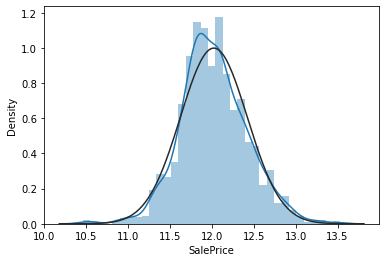

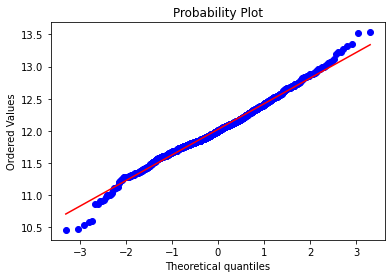

In [40]:
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


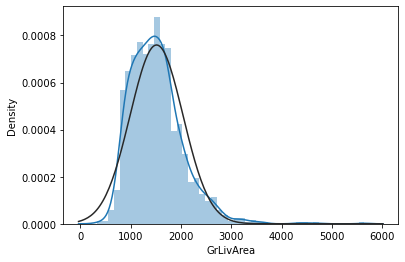

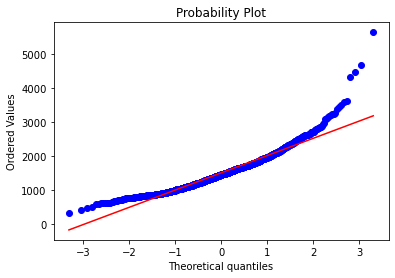

In [41]:
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [42]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_train['GrLivArea'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


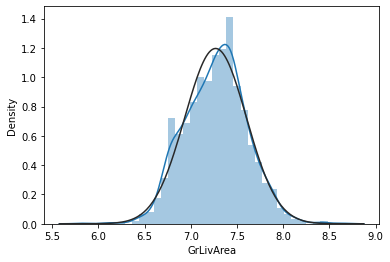

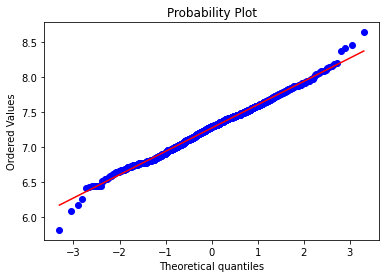

In [43]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


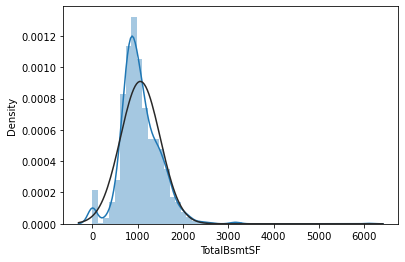

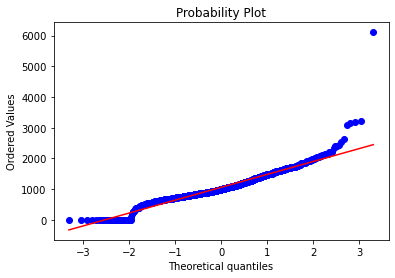

In [44]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

In [45]:
df = pd.concat([df_train, df_test])

Applying <b>One Hot Encoding</b> for nominal features.

In [46]:
# At final you know that we have handled ordinal features but we missed out nominal features so we are going to us One hot encoding..
dff = pd.get_dummies(df)

In [47]:
df_tr = dff[dff['SalePrice'].isnull()==False]
df_te = dff[dff['SalePrice'].isnull()]

In [48]:
df_te.drop(['SalePrice'], axis = 1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
df_te.shape

(1459, 213)

In [50]:
df_tr.shape

(1460, 214)

In [51]:
# Exporting dataset for  further use.
df_tr.to_csv("samp_train.csv", index = False)
df_te.to_csv("samp_test.csv", index = False)

## 5. Modeling 
Now we have done with all the data preprocessing and feature engineering process and going to create ML MODEL.
So we are upto create different models and find the best algorithm using cross validation techniques.

In [52]:
df_tr.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,0,0,7,2003,2003,196.0,2,2,4,2,706.0,150.0,856.0,0,856,854,7.444249,1.0,2,1,3,2,8,0,2003.0,2.0,548.0,0,61,12.247694,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,3,0,0,6,1976,1

In [53]:
# We are seperating our training dataset into test and train for cross validation purpose.
x_train, x_test, y_train, y_test = train_test_split(df_tr.drop(['SalePrice'], axis = 1), df_tr['SalePrice'], test_size = 0.2, random_state = 0)

We are going to do hyperparametertuning(Using GridSearchCv) for finding best hyperparameters and create models..
<br>
<br>
<b>Linear models</b>
<br>We are going to use linear models such as RidgeRegression , LassoRegression, ElasticNet Regression.For now these are as same as LinearRegression Algorithm but with some regularization our dataset is likely to overfit so linear regression is not better choice.

In [54]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
ridge = Ridge()
laso = Lasso()
elastic = ElasticNet()
grid = GridSearchCV(ridge, dict(alpha = alphas))
grid.fit(x_train, y_train)
grid1 = GridSearchCV(laso, dict(alpha = alphas))
grid1.fit(x_train, y_train)
grid2 = GridSearchCV(elastic, dict(alpha = alphas))
grid2.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.351591683397139, tolerance: 0.015367775223091382
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [55]:
# Ridge Regression Score
rpred = grid.predict(x_test)
rpred = rpred.reshape(-1, 1)
print("Ridge Regression Score's: ")
print('MAE: ', metrics.mean_absolute_error(y_test, rpred))
print('MSE: ', metrics.mean_squared_error(y_test, rpred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, rpred)+ metrics.mean_squared_error(y_test, rpred)+ np.sqrt(metrics.mean_squared_error(y_test, rpred))) / 3)

Ridge Regression Score's: 
MAE:  0.09816833739920001
MSE:  0.03416049231386764
RMSE:  0.187721543896501


In [56]:
# Lasso Regression Score
rpred = grid1.predict(x_test)
rpred = rpred.reshape(-1, 1)
print("Lasso Regression Score's: ")
print('MAE: ', metrics.mean_absolute_error(y_test, rpred))
print('MSE: ', metrics.mean_squared_error(y_test, rpred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, rpred)))
print('Average error: ', (metrics.mean_absolute_error(y_test, rpred)+ metrics.mean_squared_error(y_test, rpred)+ np.sqrt(metrics.mean_squared_error(y_test, rpred)))/ 3)

Lasso Regression Score's: 
MAE:  0.09395480387238243
MSE:  0.03573801857897045
RMSE:  0.18904501733441814
Average error:  0.106245946595257


In [57]:
# Elastic Net Regression Score.
rpred = grid2.predict(x_test)
rpred = rpred.reshape(-1, 1)
print("Elastic Net Regression Score's: ")
print('MAE: ', metrics.mean_absolute_error(y_test, rpred))
print('MSE: ', metrics.mean_squared_error(y_test, rpred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, rpred)))
print('Average error: ', (metrics.mean_absolute_error(y_test, rpred) + metrics.mean_squared_error(y_test, rpred) + np.sqrt(metrics.mean_squared_error(y_test, rpred))) / 3)

Elastic Net Regression Score's: 
MAE:  0.09421524176918858
MSE:  0.03459073057541456
RMSE:  0.18598583434072222
Average error:  0.10493060222844179


In [58]:
grid.best_params_, grid1.best_params_, grid2.best_params_

({'alpha': 1.0}, {'alpha': 0.001}, {'alpha': 0.001})

### RandomForestRegressor

In [59]:
params_rf = { 'bootstrap': [True],
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rf = RandomForestRegressor(random_state = 1)
search = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 3, n_jobs = 1, verbose = 0, return_train_score = True)

In [60]:
search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [61]:
# Support vector machine regression.
parameters = {'kernel': ('rbf', 'poly'),
             'C': [1.5, 10],
             'epsilon': [0.1, 0.2, 0.5, 0.3]}
svr = SVR(kernel = 'rbf')
clf = GridSearchCV(svr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'kernel': ('rbf', 'poly')})

In [62]:
# SVMRressor Score
rpred = clf.predict(x_test)
rpred = rpred.reshape(-1, 1)
print("SVM Regression Score's: ")
print("MAE: ", metrics.mean_absolute_error(y_test, rpred))
print("MSE: ", metrics.mean_squared_error(y_test, rpred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, rpred)))
print('Average error: ', (metrics.mean_absolute_error(y_test, rpred) + metrics.mean_squared_error(y_test, rpred) + np.sqrt(metrics.mean_squared_error(y_test, rpred))) / 3)

SVM Regression Score's: 
MAE:  0.12834141840373153
MSE:  0.03471759074236816
RMSE:  0.186326570145989
Average error:  0.11646185976402956


### Final Submission
Now we ahev tried out some regression models and ElasticNet Regression average score are pretty well so we re going to predict test dataset with this model and submit the prediction.

In [63]:
# Creating model with the parameter predicted by GridSearchCV
model = ElasticNet(alpha = 0.001)
model.fit(df_tr.drop(['SalePrice'], axis = 1), df_tr['SalePrice'])
pr = model.predict(df_te)
pr

array([ 9.83224461, 10.06175572, 10.0815396 , ..., 10.10042222,
        9.88803154, 10.27739372])

In [64]:
# Applying exponent for the predicted value because we have used log transformation for SalePrice so we have to inverse it.
pr = np.expm1(pr)
pr

array([18623.71253981, 23428.60605194, 23896.75011098, ...,
       24352.28966756, 19692.25645707, 29067.01534746])

In [66]:
# submit the prediction
df_test = pd.read_csv('test.csv')
sample_submission = pd.DataFrame({'Id': np.array(df_test.Id), 'SalePrice': pr})
sample_submission.to_csv("submission.csv", index = False)

### <Center> <B>Thank you</B> </Center>